# Predicting heart disease using an artificial neural network.

In [549]:
# importing libraries
from scipy.io.arff import loadarff #used to load and read the arff file in to avoid corruption
import pandas as pd #used for manipulating data through the use of dataframes
import numpy as np #performing mathmatical operations on arrays (used for selecting percentiles ready for ANN)
import matplotlib.pyplot as plt #used to create visualisations
import seaborn as sns #used to create visualisations (based on matplotlib)
import statistics #statistics of data including averages, variation etc.

from sklearn.preprocessing import LabelEncoder #used for preparing/ normalising the dataset ready for the prediction program
from sklearn.metrics import make_scorer, accuracy_score #used to calculate the metrics of the dataset
from sklearn.model_selection import GridSearchCV 
from sklearn.neural_network import MLPClassifier #multi-layer perceptron classifier can define max interations and 
from sklearn.model_selection import train_test_split as tts #splits the dataset into seperate training and testing sets
from sklearn.preprocessing import MinMaxScaler
#from sklearn.metrics import confusion_matrix

import tensorflow as tf
import keras

## Data Preproccessing & Normalisation

In [550]:
content = loadarff(r'data.arff') #reading/ loading the data
df = pd.DataFrame(content[0])

df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,Class
0,160.0,12.00,5.73,23.11,b'1',49.0,25.30,97.20,52.0,b'2'
1,144.0,0.01,4.41,28.61,b'2',55.0,28.87,2.06,63.0,b'2'
2,118.0,0.08,3.48,32.28,b'1',52.0,29.14,3.81,46.0,b'1'
3,170.0,7.50,6.41,38.03,b'1',51.0,31.99,24.26,58.0,b'2'
4,134.0,13.60,3.50,27.78,b'1',60.0,25.99,57.34,49.0,b'2'


In [551]:
attr = ['V1: sbp', 'V2: tobacco', 'V3: ldl', 'V4: adiposity', 'V5: famhist', 'V6: type', 'V7: obesity', 'V8: alcohol', 'V9: age']
df.columns = ['V1: sbp', 'V2: tobacco', 'V3: ldl', 'V4: adiposity', 'V5: famhist', 'V6: type', 'V7: obesity', 'V8: alcohol', 'V9: age', 'Class: chd']

attr #this is a list containing the column names which will be used later for normalising and testing the dataset. It only contains the numeric columns. 

['V1: sbp',
 'V2: tobacco',
 'V3: ldl',
 'V4: adiposity',
 'V5: famhist',
 'V6: type',
 'V7: obesity',
 'V8: alcohol',
 'V9: age']

In [552]:
encoder = LabelEncoder()
scaler = MinMaxScaler()
df['V5: famhist']=encoder.fit_transform(df['V5: famhist'])
df['Class: chd']=encoder.fit_transform(df['Class: chd'])
df.head()

,V1: sbp,V2: tobacco,V3: ldl,V4: adiposity,V5: famhist,V6: type,V7: obesity,V8: alcohol,V9: age,Class: chd
0,160.0,12.00,5.73,23.11,0,49.0,25.30,97.20,52.0,1
1,144.0,0.01,4.41,28.61,1,55.0,28.87,2.06,63.0,1
2,118.0,0.08,3.48,32.28,0,52.0,29.14,3.81,46.0,0
3,170.0,7.50,6.41,38.03,0,51.0,31.99,24.26,58.0,1
4,134.0,13.60,3.50,27.78,0,60.0,25.99,57.34,49.0,1


In [553]:
length = 250
tick = range(-10, length+5, 5) #defining parameters for the boxplots

<AxesSubplot:>

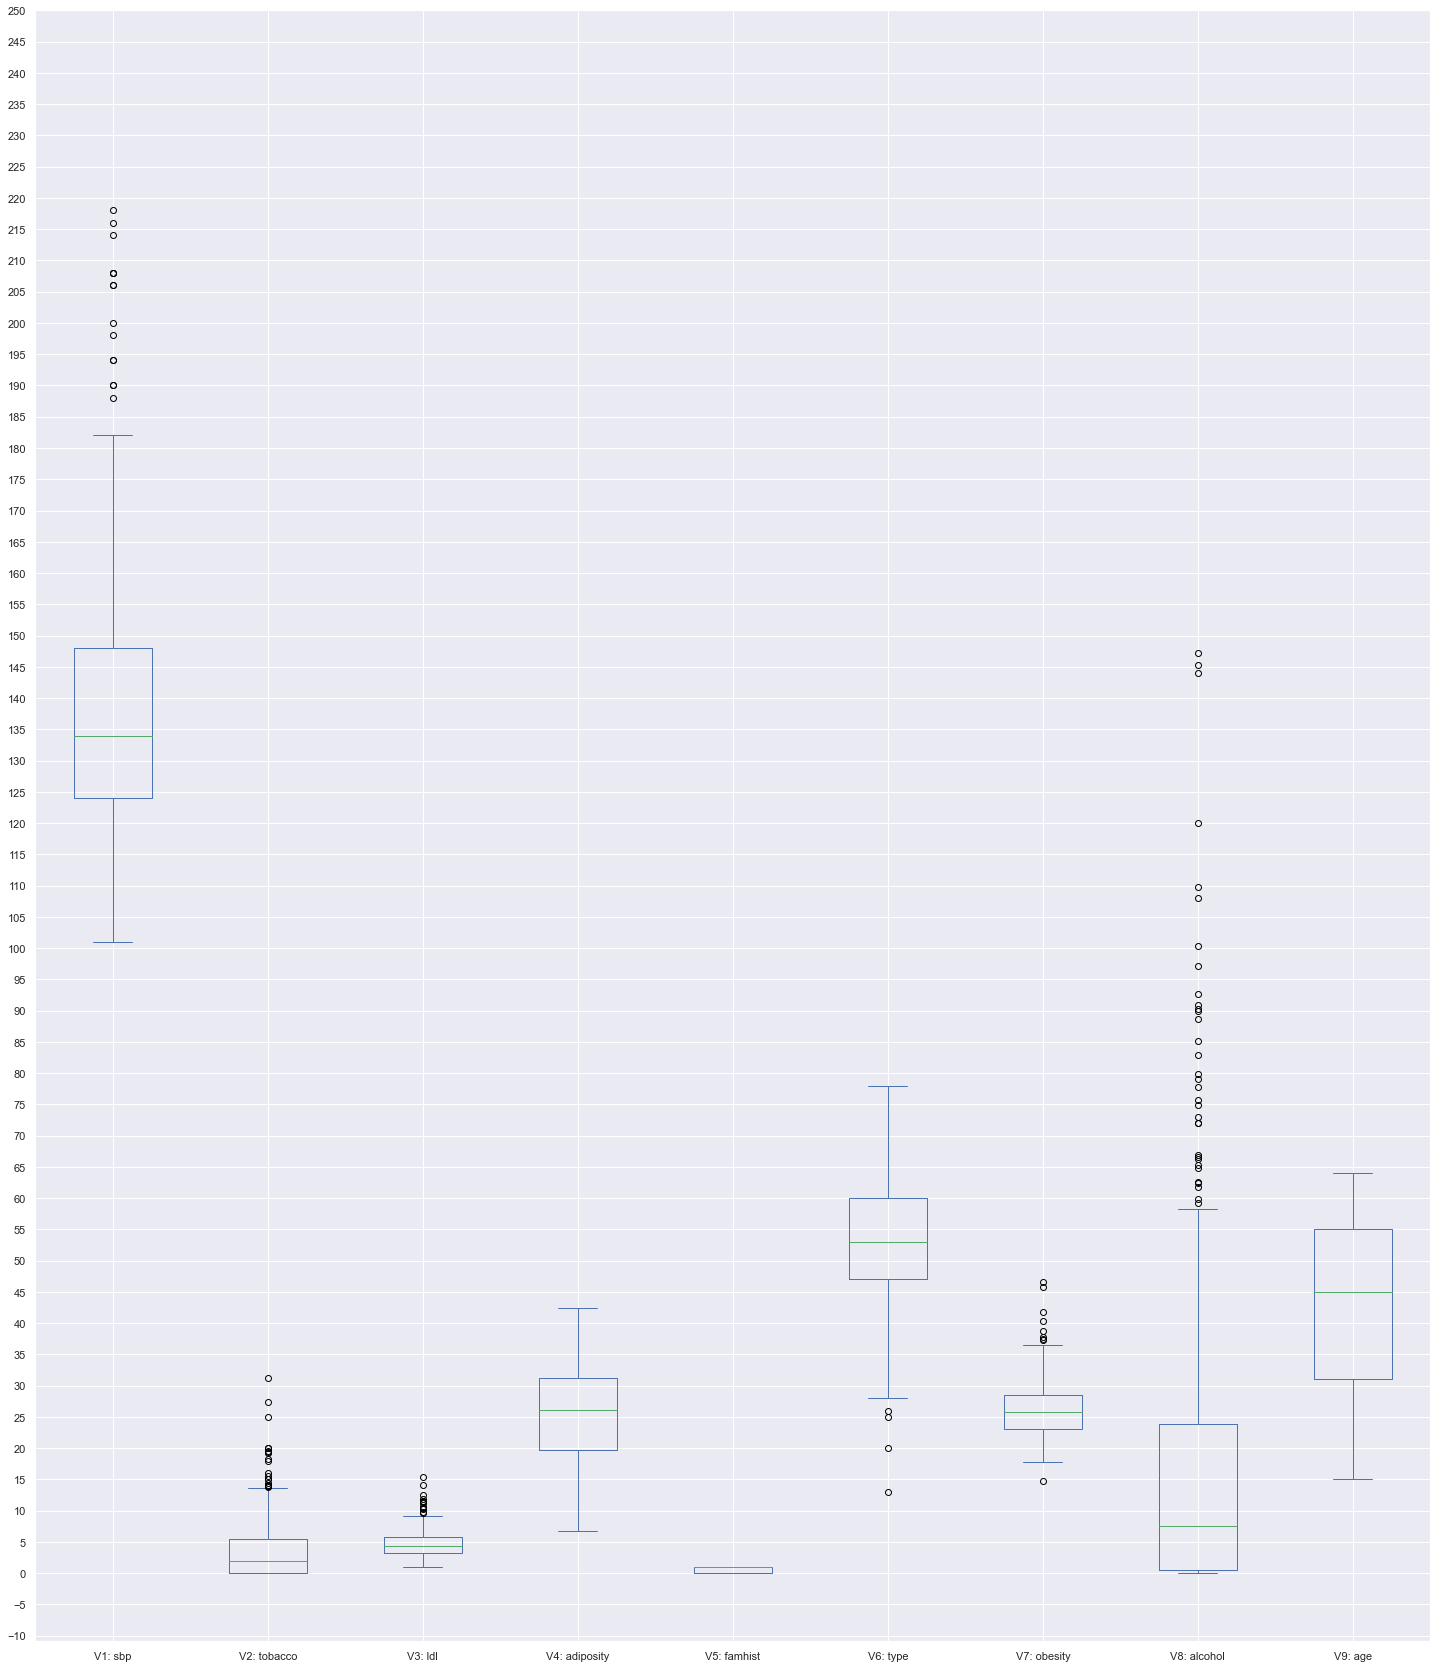

In [554]:
df[attr].plot(kind='box',figsize=(25,30),yticks=tick)

In [555]:
# time to remove the dots (data outside of the boxplot) to make the prediction more accurate
for col in attr:
    q3, q1 = np.percentile(df[col], [75,25])
    IQR = q3 - q1
    maxbP = q3 + 1.5 * IQR
    minbP = q1 - 1.5 * IQR
    df = df[(df[col] > minbP) & (df[col] < maxbP)]
    
df.head()

,V1: sbp,V2: tobacco,V3: ldl,V4: adiposity,V5: famhist,V6: type,V7: obesity,V8: alcohol,V9: age,Class: chd
1,144.0,0.01,4.41,28.61,1,55.0,28.87,2.06,63.0,1
2,118.0,0.08,3.48,32.28,0,52.0,29.14,3.81,46.0,0
3,170.0,7.50,6.41,38.03,0,51.0,31.99,24.26,58.0,1
5,132.0,6.20,6.47,36.21,0,62.0,30.77,14.14,45.0,0
6,142.0,4.05,3.38,16.20,1,59.0,20.81,2.62,38.0,0


<AxesSubplot:>

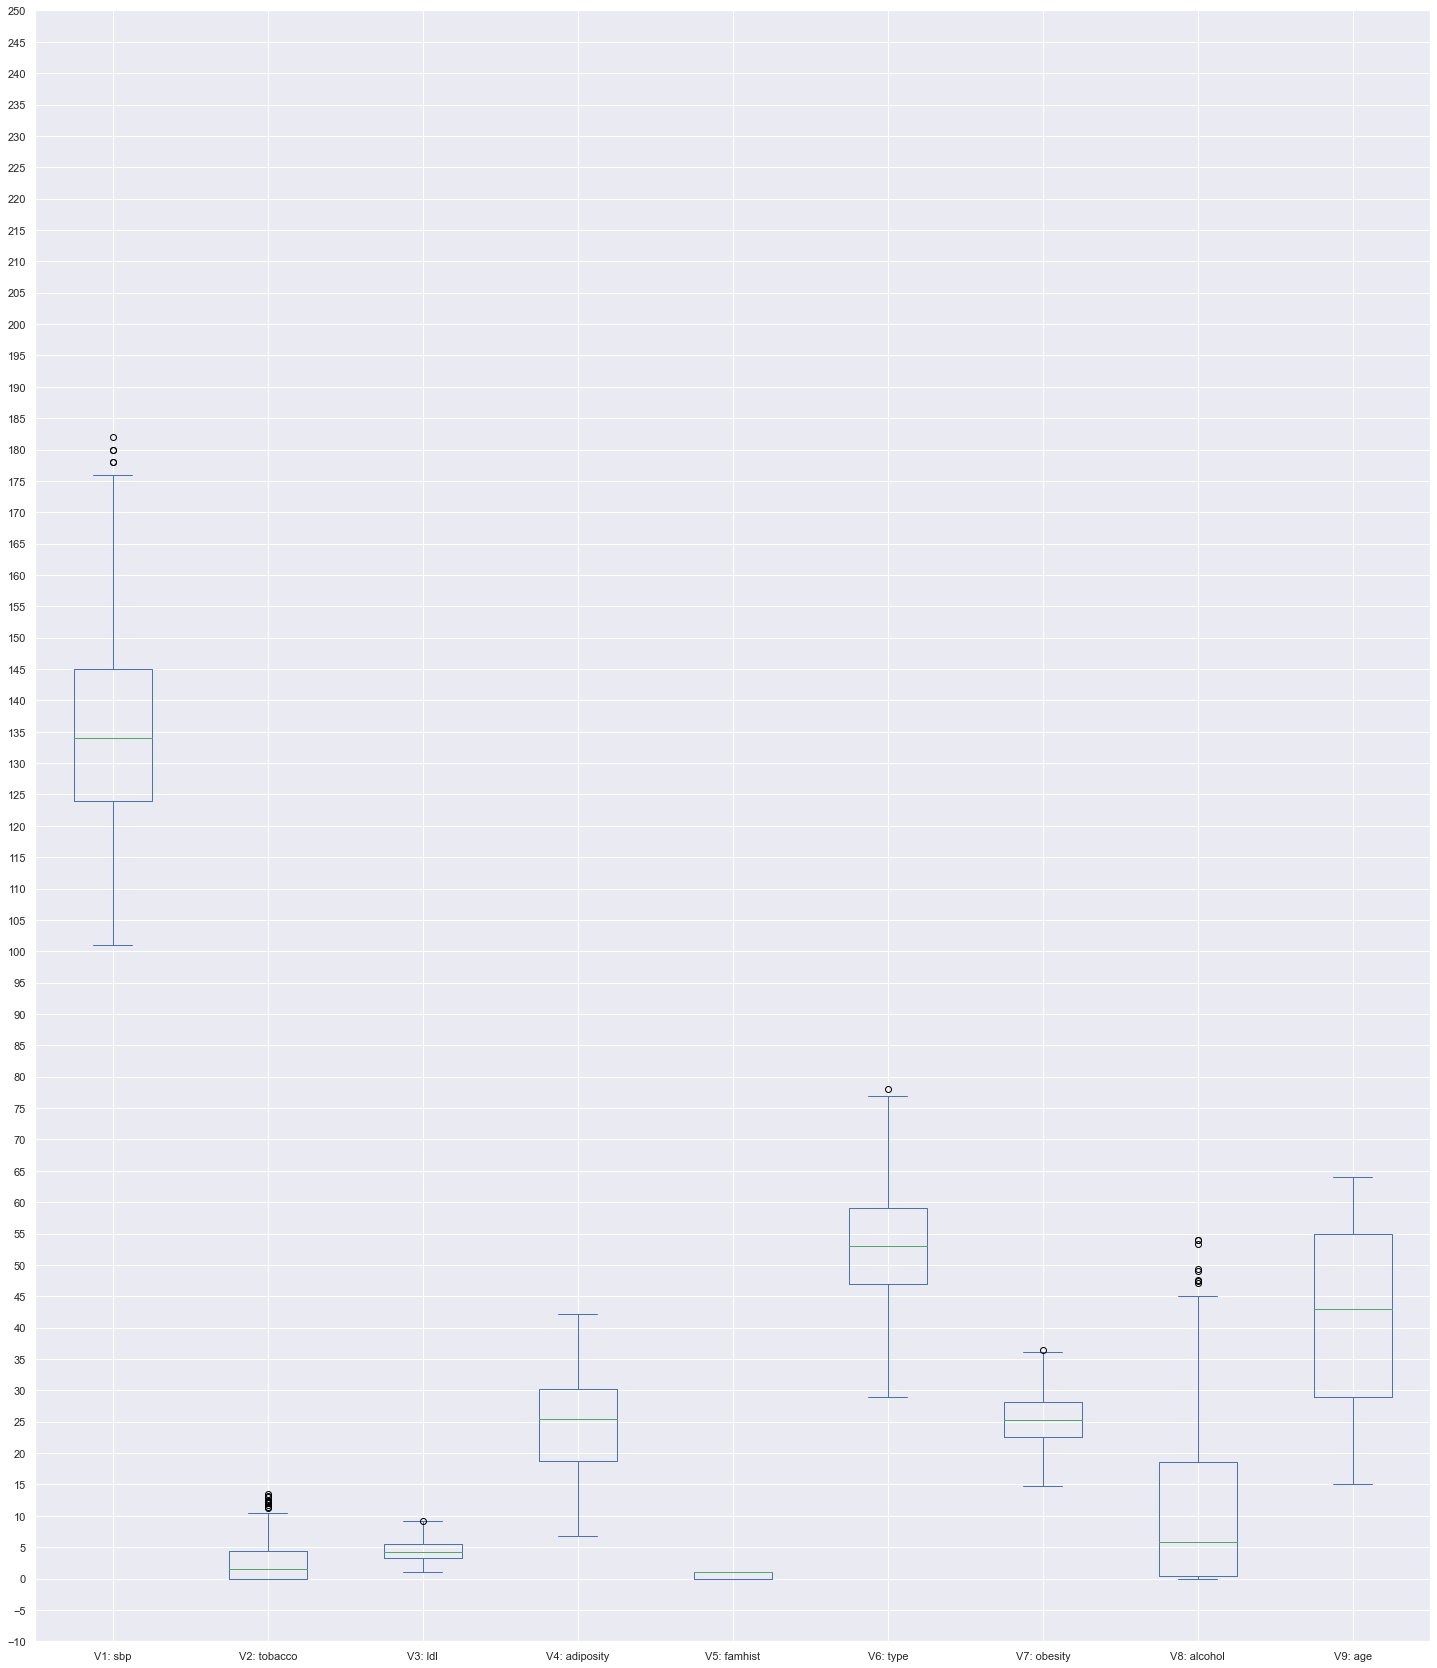

In [556]:
df[attr].plot(kind='box',figsize=(25,30),yticks=tick)

In [557]:
df[attr] = scaler.fit_transform(df[attr]) 
df.head()

,V1: sbp,V2: tobacco,V3: ldl,V4: adiposity,V5: famhist,V6: type,V7: obesity,V8: alcohol,V9: age,Class: chd
1,0.530864,0.000741,0.417783,0.617273,1.0,0.530612,0.651195,0.038148,0.979592,1
2,0.209877,0.005926,0.304507,0.720858,0.0,0.469388,0.663603,0.070556,0.632653,0
3,0.851852,0.555556,0.661389,0.883150,0.0,0.448980,0.794577,0.449259,0.877551,1
5,0.382716,0.459259,0.668697,0.831781,0.0,0.673469,0.738511,0.261852,0.612245,0
6,0.506173,0.300000,0.292326,0.267005,1.0,0.612245,0.280790,0.048519,0.469388,0


In [558]:
df.isnull().any()

V1: sbp          False
V2: tobacco      False
V3: ldl          False
V4: adiposity    False
V5: famhist      False
V6: type         False
V7: obesity      False
V8: alcohol      False
V9: age          False
Class: chd       False
dtype: bool

In [559]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377 entries, 1 to 461
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   V1: sbp        377 non-null    float64
 1   V2: tobacco    377 non-null    float64
 2   V3: ldl        377 non-null    float64
 3   V4: adiposity  377 non-null    float64
 4   V5: famhist    377 non-null    float64
 5   V6: type       377 non-null    float64
 6   V7: obesity    377 non-null    float64
 7   V8: alcohol    377 non-null    float64
 8   V9: age        377 non-null    float64
 9   Class: chd     377 non-null    int32  
dtypes: float64(9), int32(1)
memory usage: 30.9 KB


In [560]:
df.describe()

,V1: sbp,V2: tobacco,V3: ldl,V4: adiposity,V5: famhist,V6: type,V7: obesity,V8: alcohol,V9: age,Class: chd
count,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000
mean,0.427907,0.207350,0.428949,0.501601,0.588859,0.492448,0.496982,0.210661,0.542738,0.310345
std,0.206805,0.241956,0.211649,0.218006,0.492695,0.188056,0.173281,0.248396,0.308733,0.463250
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.283951,0.000000,0.272838,0.338132,0.000000,0.367347,0.362592,0.006852,0.285714,0.000000
50%,0.407407,0.111111,0.389769,0.526390,1.000000,0.489796,0.485294,0.108519,0.571429,0.000000
75%,0.543210,0.330370,0.560292,0.662997,1.000000,0.612245,0.614430,0.342778,0.816327,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [561]:
df['V5: famhist'].value_counts()

1.0    222
0.0    155
Name: V5: famhist, dtype: int64

In [562]:
df['Class: chd'].value_counts()

0    260
1    117
Name: Class: chd, dtype: int64

In [563]:
scale = MinMaxScaler(feature_range =(0,100))

### The variation of values across the DataFrame for first 50 values

<AxesSubplot:>

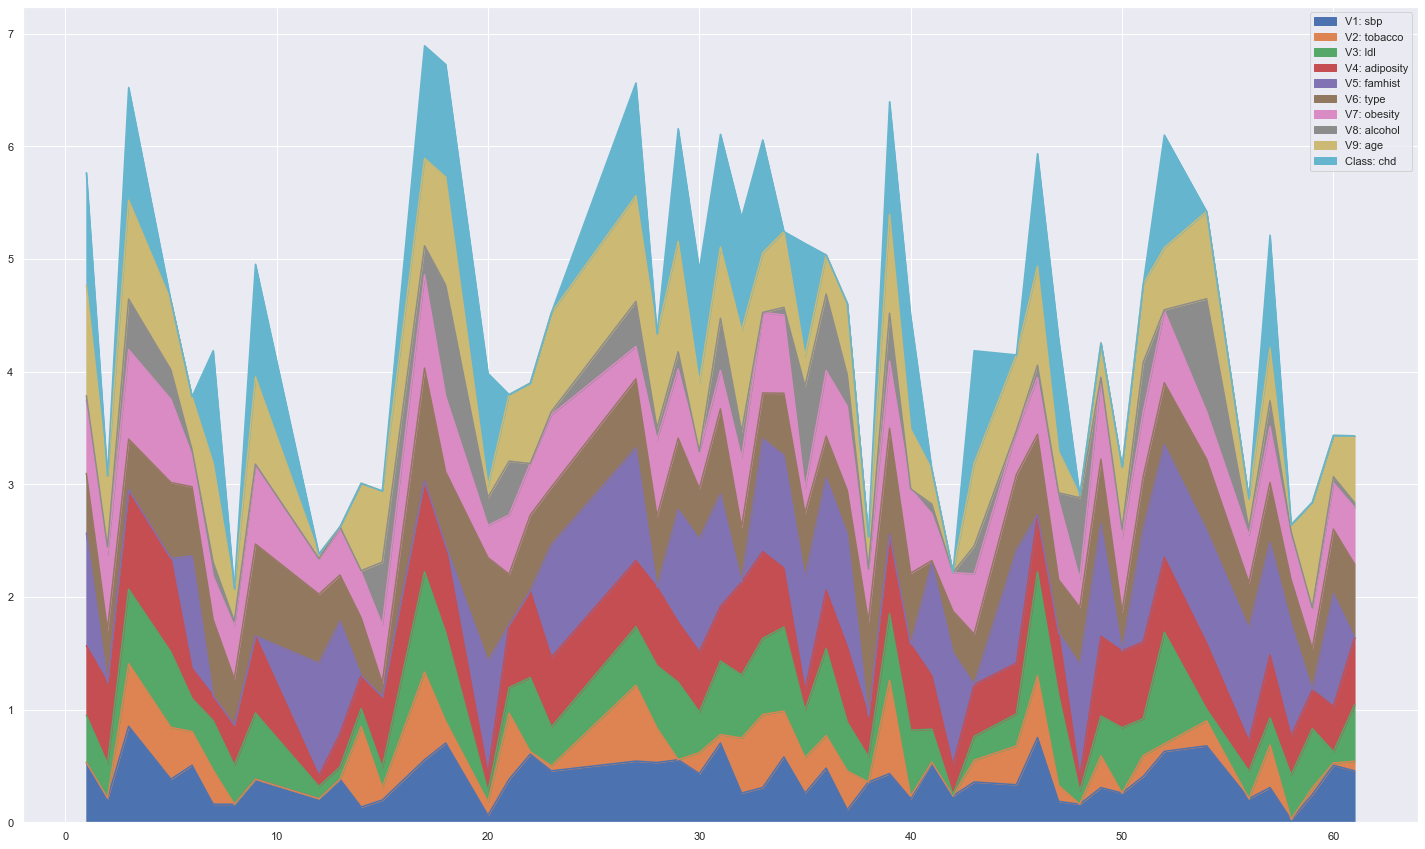

In [564]:
df.head(50).plot(kind='area',figsize=(25,15))

### Distribution of Obesity according to the age

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='V9: age', ylabel='V7: obesity'>

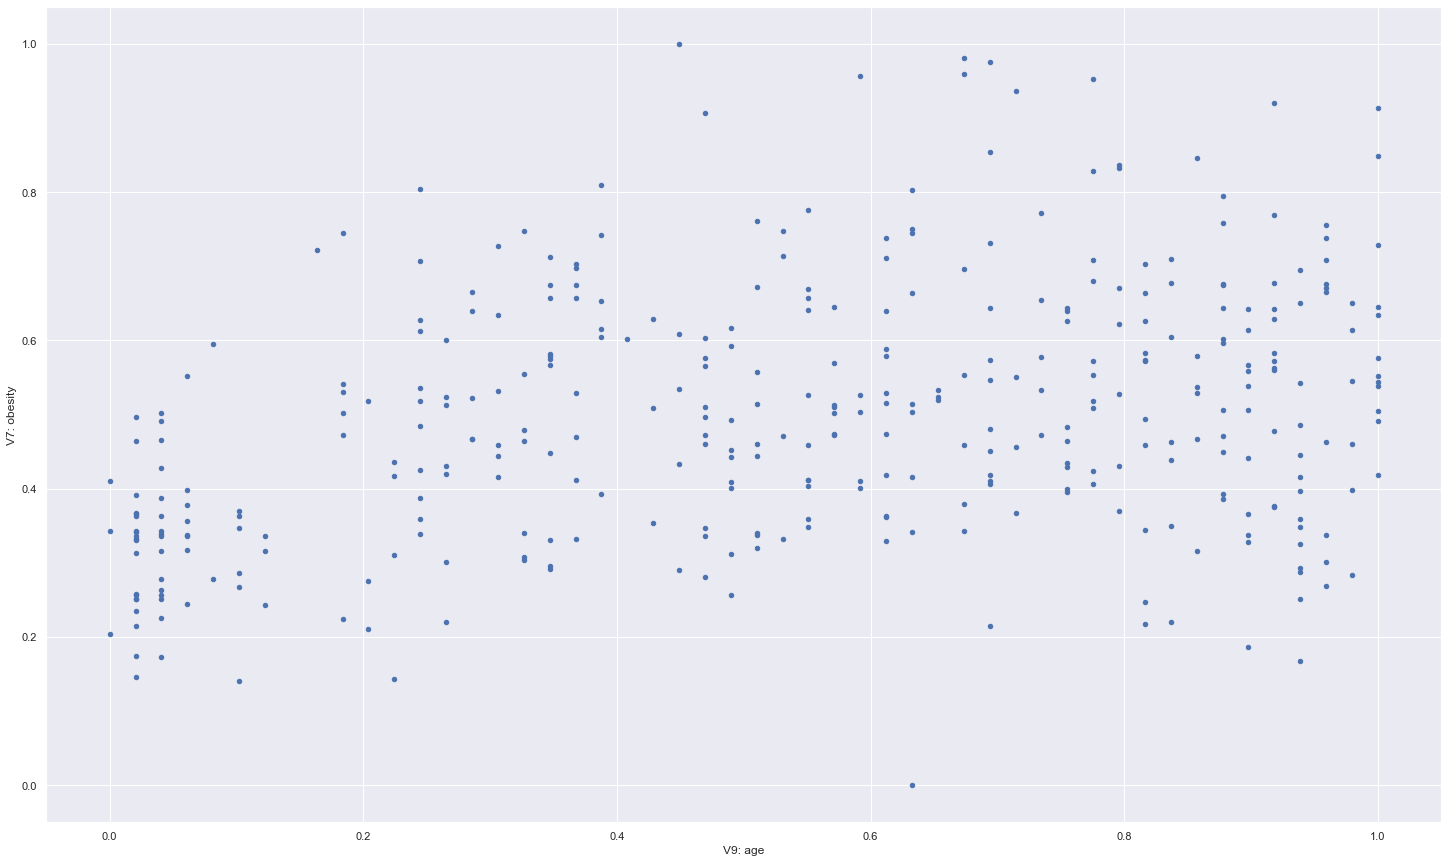

In [565]:
df.plot(x='V9: age',y='V7: obesity',kind='scatter',figsize =(25,15))

### Distribution of Tobacco consumption across age

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='V9: age', ylabel='V2: tobacco'>

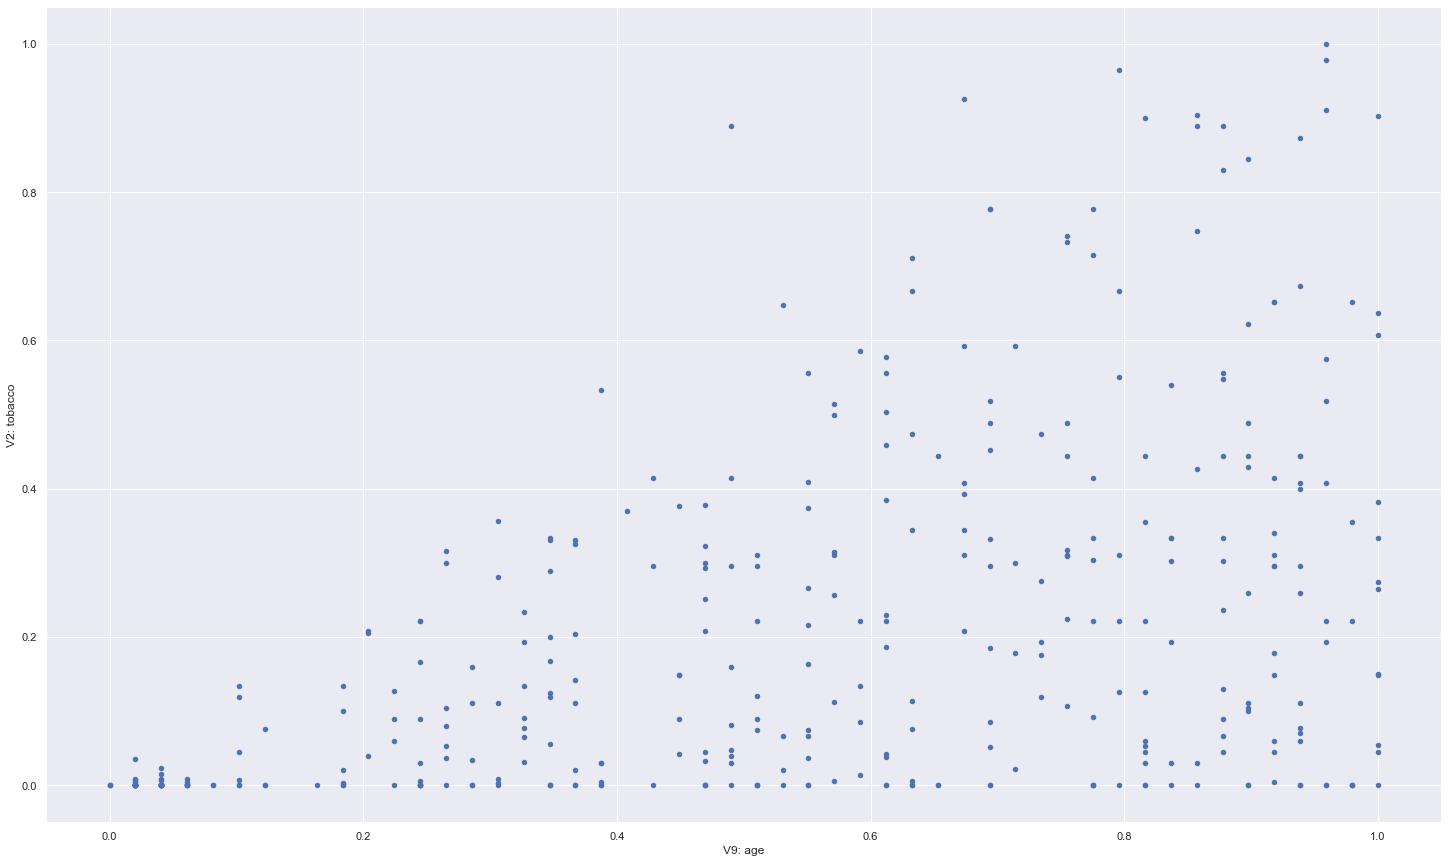

In [566]:
df.plot(x='V9: age',y='V2: tobacco',kind='scatter',figsize =(25,15))

### Distribution of Alcohol consumption across age

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='V9: age', ylabel='V8: alcohol'>

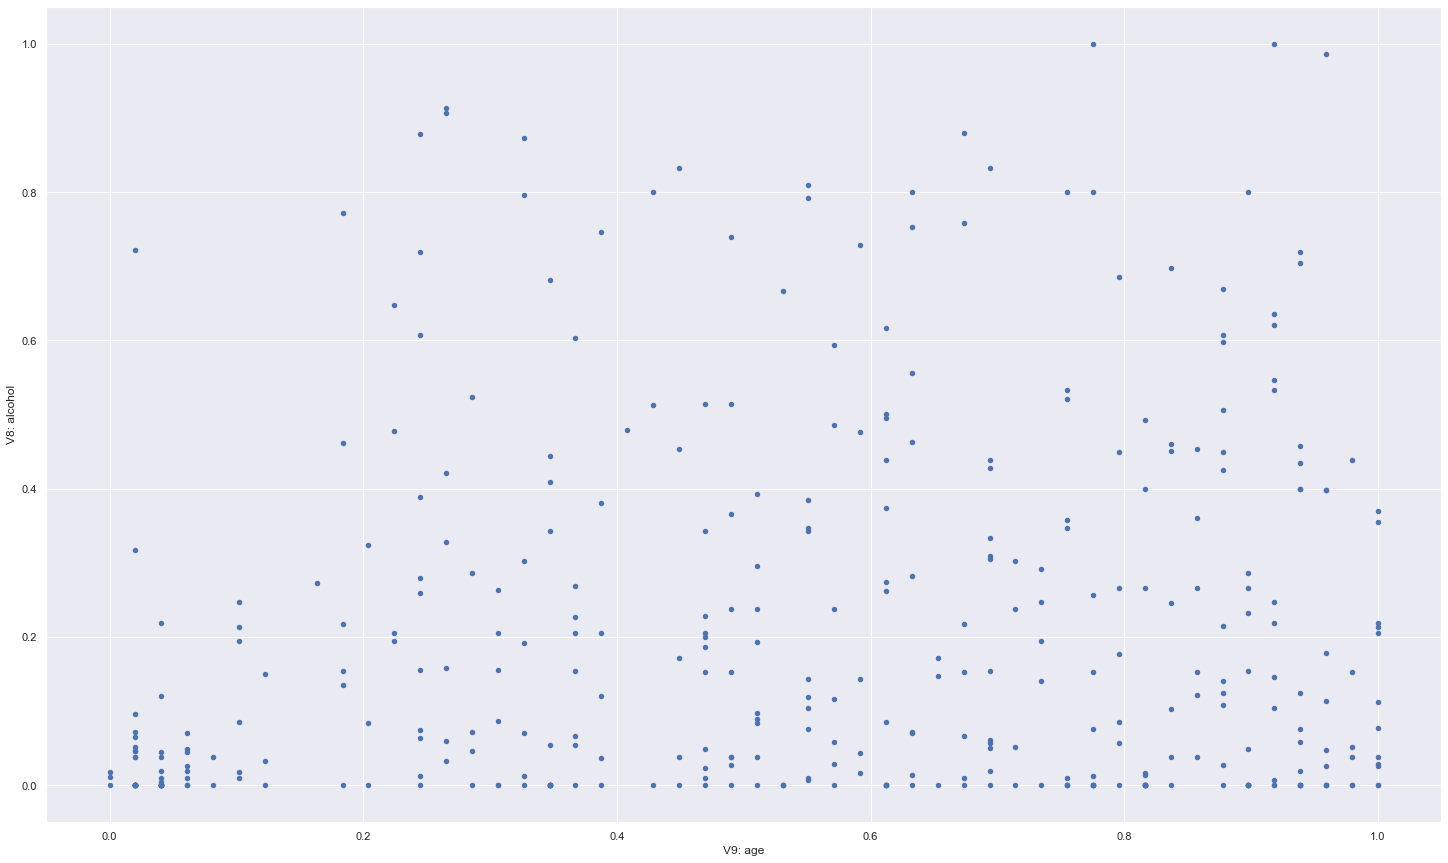

In [567]:
df.plot(x='V9: age',y='V8: alcohol',kind='scatter',figsize =(25,15))

## Testing and Training

In [568]:
Xtrain, Xtest, ytrain, ytest = tts(df[attr], df['Class: chd'], test_size=0.3, random_state=0)

<AxesSubplot:>

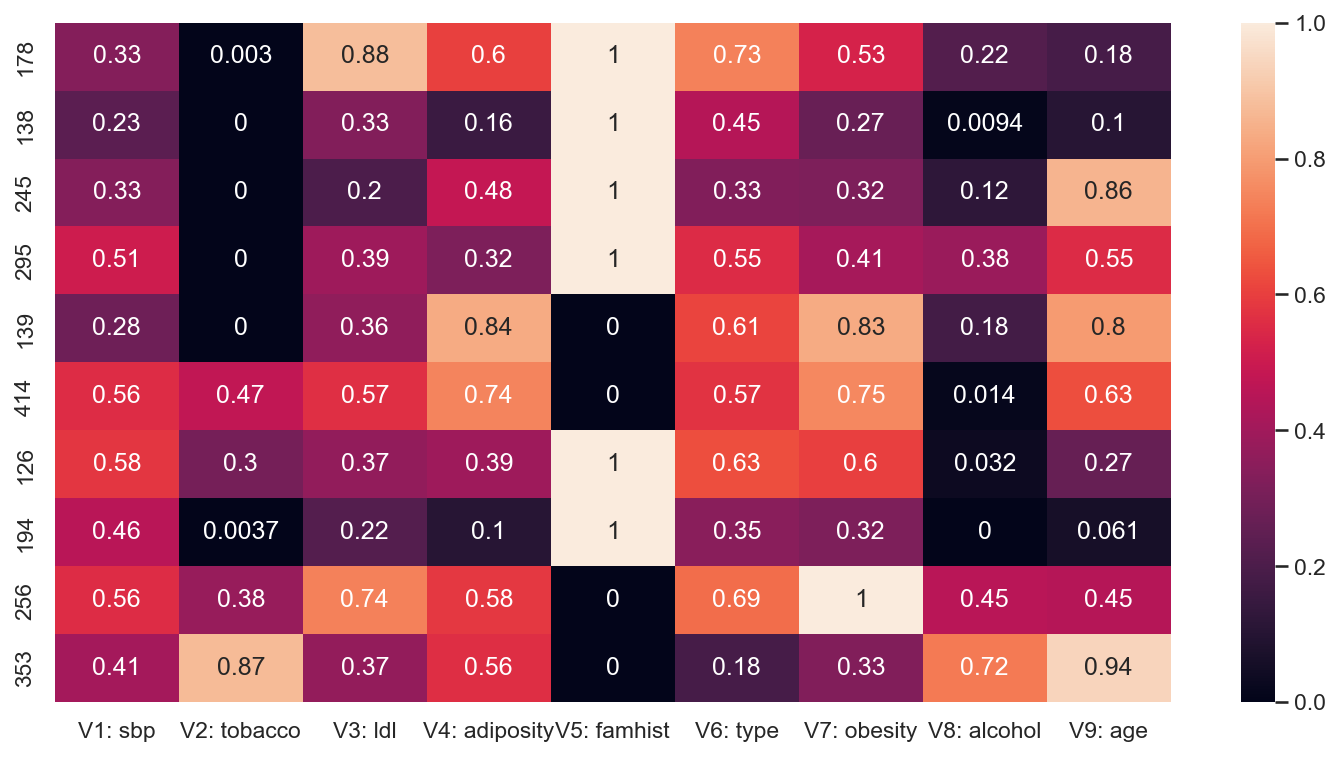

In [569]:
sns.set()
plt.figure(figsize=(12, 6), dpi=150)
sns.heatmap(data = Xtrain.head(10),annot = True)

In [570]:
print('Training Features shape', Xtrain.shape)
print('Training Labels shape', ytrain.shape)
print('Testing Features shape', Xtest.shape)
print('Testing Labels shape', ytest.shape)

Training Features shape (263, 9)
Training Labels shape (263,)
Testing Features shape (114, 9)
Testing Labels shape (114,)


In [571]:
rand = statistics.mode(ytrain)
pred = [rand] *len(ytest)

BaseAcc = accuracy_score(ytest , pred)
print(f'Base Line Accuracy: {round(BaseAcc*100, 0)}%' )

Base Line Accuracy: 65.0%


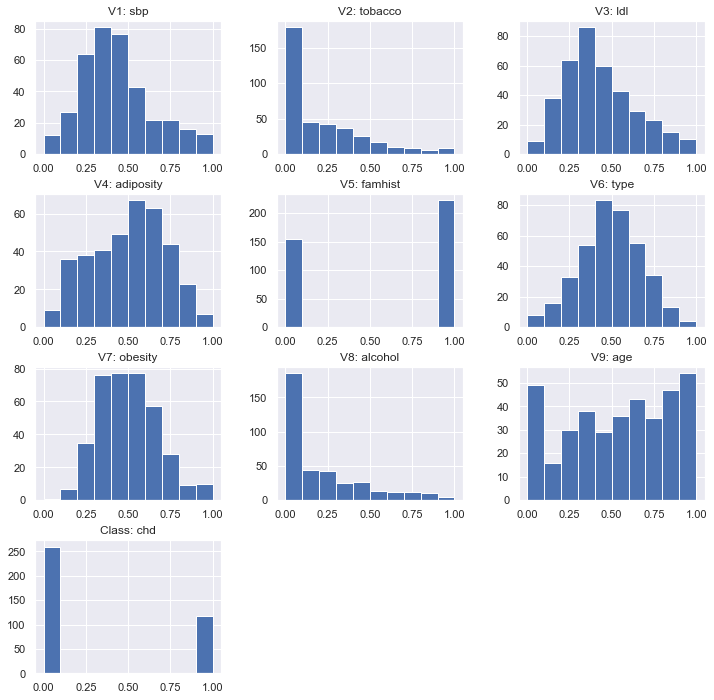

In [572]:
df.hist(figsize=(12, 12))
plt.show()

In [573]:
mlp = MLPClassifier(max_iter=5000)
para = {'solver': ['lbfgs'],
             'alpha':[1e-4],
             'hidden_layer_sizes':(9,20,20,2),   # 9 input, 14-14 neuron in 2 layers,1 output layer
             'random_state': [1234],
             'max_iter':[10000],
             'early_stopping':[False]}

score = make_scorer(accuracy_score)

# Run grid search 
grid = GridSearchCV(mlp, para, scoring=score,cv = 5)
grid = grid.fit(Xtrain, ytrain)

# Pick the best combination of parameters
ann_clf = grid.best_estimator_
mlp.fit(Xtrain, ytrain)

MLPClassifier(max_iter=5000)

In [574]:
mlp_pred = mlp.predict(Xtest)
mlp_pred

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1])

In [575]:
mlp_acc = accuracy_score(ytest, mlp_pred)
print(f'the ANN accuracy is: {round(mlp_acc * 100, 0)}%' )

the ANN accuracy is: 75.0%


In [576]:
trainMod = keras.Sequential([
    keras.layers.Dense(9, input_shape=(9,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
     ])
trainMod.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

history = trainMod.fit(Xtrain, ytrain, epochs=200)
history

Epoch 1/200
9/9 [==============================] - 0s 1ms/step - loss: 0.6828 - accuracy: 0.5551
Epoch 2/200
9/9 [==============================] - 0s 865us/step - loss: 0.6688 - accuracy: 0.6350
Epoch 3/200
9/9 [==============================] - 0s 1ms/step - loss: 0.6556 - accuracy: 0.6768
Epoch 4/200
9/9 [==============================] - 0s 959us/step - loss: 0.6438 - accuracy: 0.7110
Epoch 5/200
9/9 [==============================] - 0s 883us/step - loss: 0.6325 - accuracy: 0.7110
Epoch 6/200
9/9 [==============================] - 0s 941us/step - loss: 0.6222 - accuracy: 0.7300
Epoch 7/200
9/9 [==============================] - 0s 875us/step - loss: 0.6136 - accuracy: 0.7224
Epoch 8/200
9/9 [==============================] - 0s 750us/step - loss: 0.6049 - accuracy: 0.7186
Epoch 9/200
9/9 [==============================] - 0s 944us/step - loss: 0.5981 - accuracy: 0.7186
Epoch 10/200
9/9 [==============================] - 0s 891us/step - loss: 0.5929 - accuracy: 0.7224
Epoch 11/200


In [577]:
mlp_acc = accuracy_score(ytest, mlp_pred)
print(f'MLP ANN accuracy is: {round(mlp_acc * 100, 0)}%' )

MLP ANN accuracy is: 75.0%


In [578]:
loss = history.history['loss']
accuracy = history.history['accuracy']
epochs = history.epoch

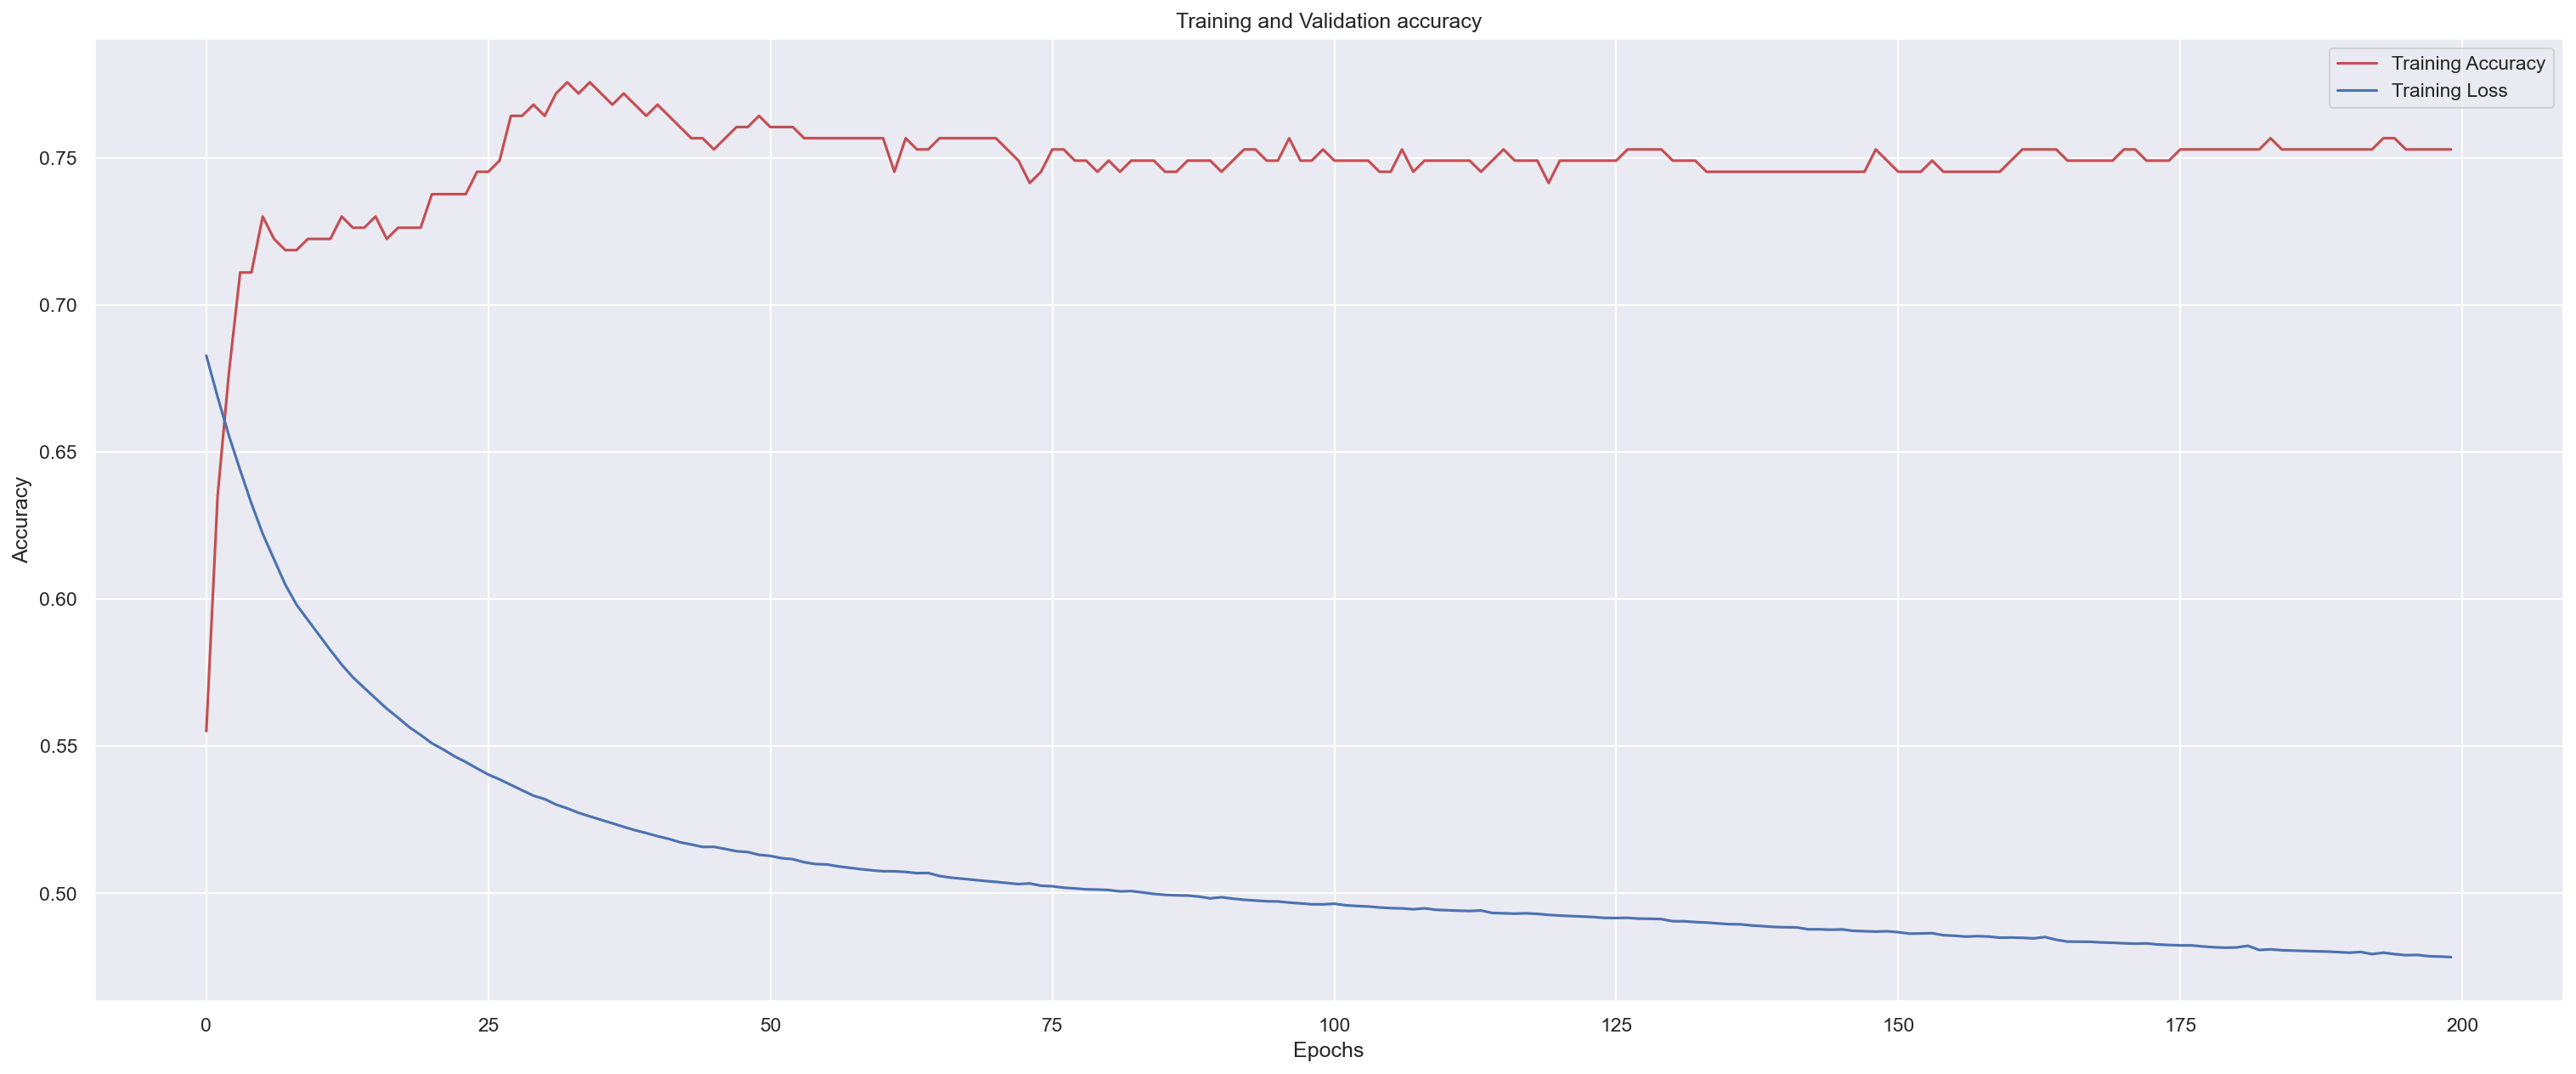

In [579]:
plt.figure(figsize=(25,10), dpi=150)
plt.plot(history.epoch, history.history['accuracy'], 'r', label='Training Accuracy')
plt.plot(history.epoch, history.history['loss'], 'b', label='Training Loss')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()